In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
FILEPATH = "input/netflix_titles.csv"

## Notes

* I have used various libraries to make it better
* Though import libraries on top section is good and clean, but for learning purposes I have used all imports whereever they needed to understand better.
* I have added `Observation` after some analysis with a little summary. Hope it helps!
* Enjoy learning and give me some feedback

(still adding more documentation)

## Reading Time

Let's start read the data first

In [3]:
df = pd.read_csv(FILEPATH)

In [4]:
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


#### Observation:
There are 6234 entries in the dataset.

There are 2 integer types and rest of them are string objects. 

show_id and release_year are mentioned in integers. Later, we will create year_added and month_added for better analysis

## Finding Null and Correlation

we will find what columns have null and some relationships between the columns. 

We will use **missingno** library as it gives better visualiation

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
df.isnull().sum().sum()

3036

#### Observation:

There are 3036 entries are null which are mostly from director col. 

director, cast, and country columns have most null entries!

Let's do the visualization of those null entires with missingno library.

In [8]:
import missingno as miss
import matplotlib.pyplot as plt

%matplotlib inline

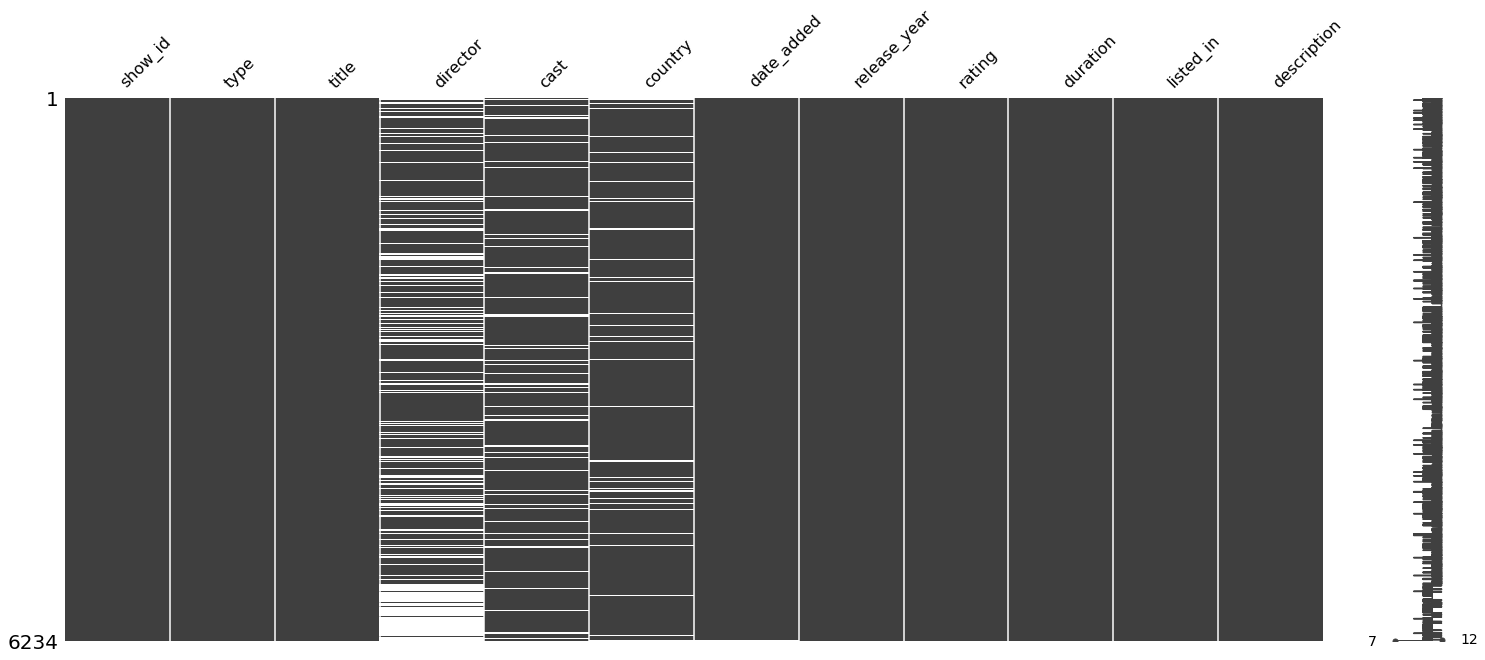

In [9]:
miss.matrix(df)
plt.show()

Also, we will try to find the relationship by using dendogram and heatmap

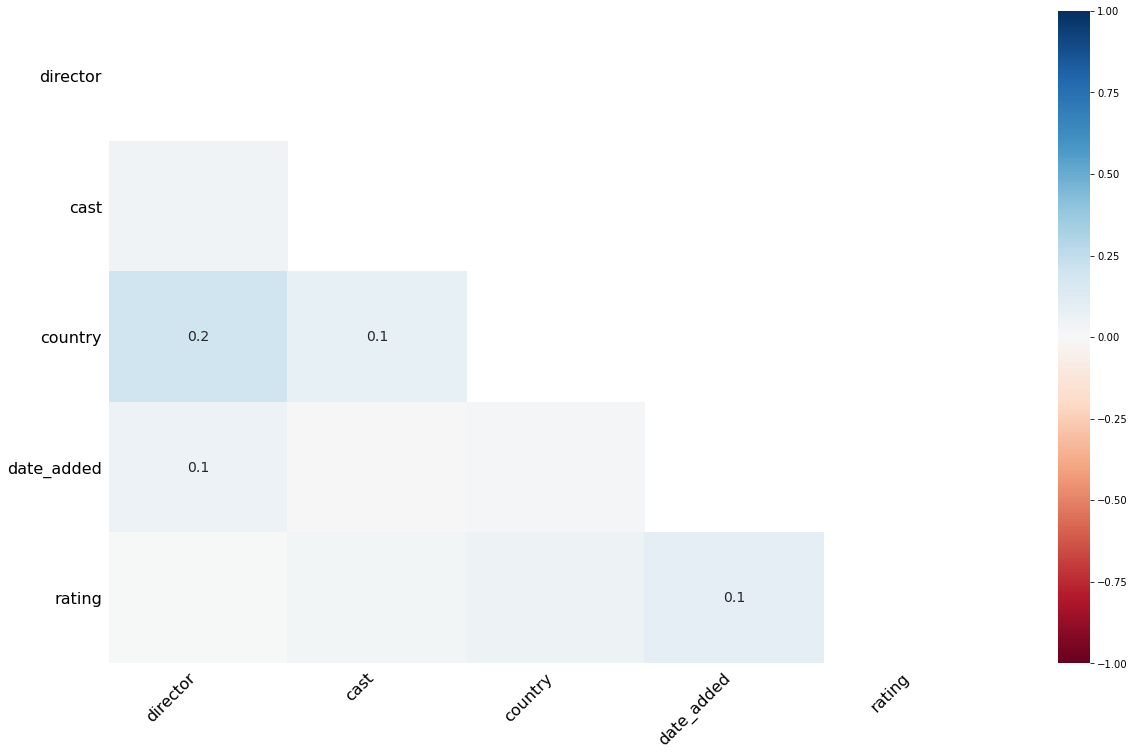

In [10]:
miss.heatmap(df)

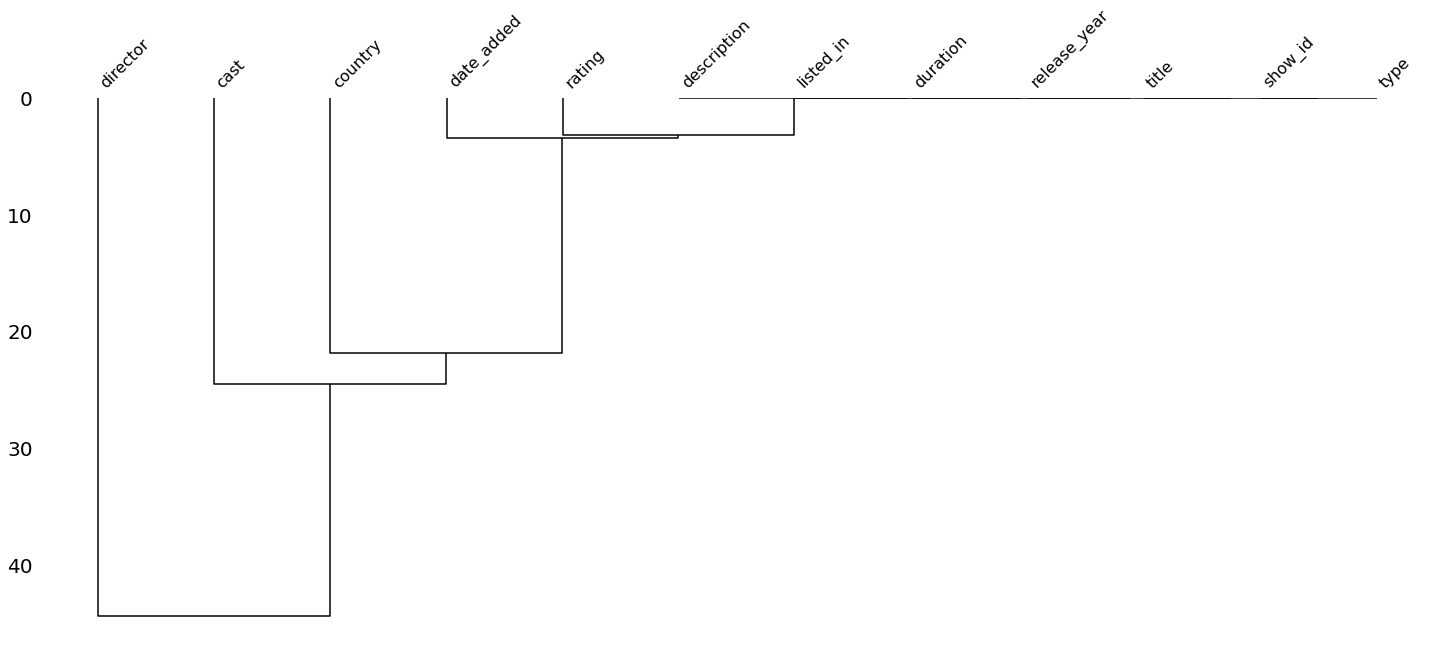

In [11]:
miss.dendrogram(df)

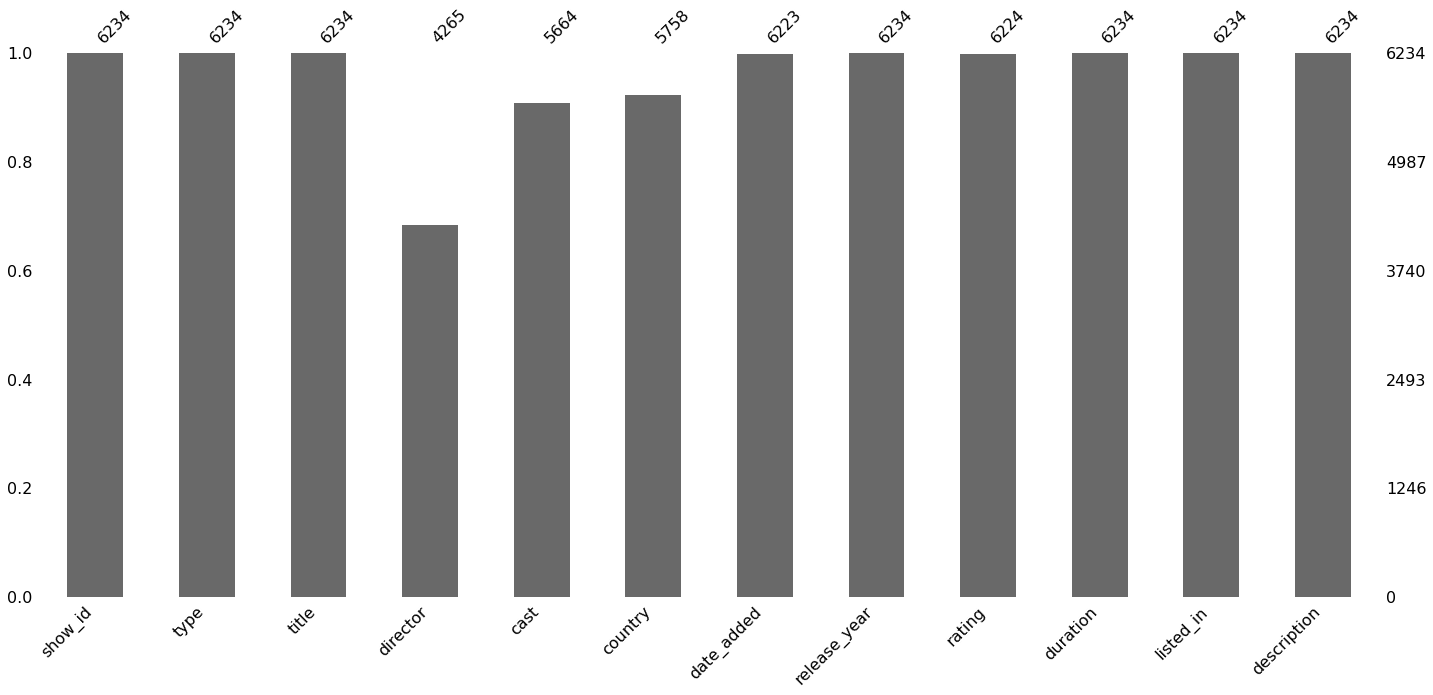

In [12]:
miss.bar(df.sample(len(df)))

## Extra columns

As we need year and month for content added analysis, we are going to create those columns from date_added column.

In [13]:
# Let's convert added_date to year
df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

df['year_added'] = df['year_added'].fillna(2008)
df['month_added'] = df['month_added'].fillna(0)

# convert float to int
df['year_added'] = df['year_added'].astype(int)
df['month_added'] = df['month_added'].astype(int)

#### Observation:

In the above code, we have used 2008 to fill the NA columns on year_added to avoid the visualization confusion. I will talk about later. If you have a better idea, please share with me in the comment section.

Let's verify those columns to make sure the datatype.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6234 non-null   int64         
 1   type          6234 non-null   object        
 2   title         6234 non-null   object        
 3   director      4265 non-null   object        
 4   cast          5664 non-null   object        
 5   country       5758 non-null   object        
 6   date_added    6223 non-null   datetime64[ns]
 7   release_year  6234 non-null   int64         
 8   rating        6224 non-null   object        
 9   duration      6234 non-null   object        
 10  listed_in     6234 non-null   object        
 11  description   6234 non-null   object        
 12  month_added   6234 non-null   int64         
 13  year_added    6234 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 682.0+ KB


Check head one more time to confirm the newly created columns.

In [15]:
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country date_added  release_year  \
0  United States, India, South Korea, China 2019-09-09          2019   
1                            United Kingdom 2016-09-09          2016   
2                             United States 2018-09-08          2013   
3                             United States 2018-09-08          2016   
4                             United States 2017-09-08          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  month_added  year_added  
0  Before planning an awesome wedding for his gra...            9        2019  
1  Jandino Asporaat riffs on the challenges of ra...            9        2016  
2  With the help of three human allies, the Autob...            9        2018  
3  When a prison ship crash unleashes hundreds of...            9        2018  
4  When nerdy high schooler Dani finally attracts...            9        2017

## TV Show Dataset

As we will be analyzing only TV Shows, it's better to divide the dataset for TV Show alone. We will create them below.

In [16]:
# Get only TV Shows
df_tv = df[df['type'] == 'TV Show']

### TV Show Content Growt

Let's do a simple plot to understand the TV Show content growth over years.

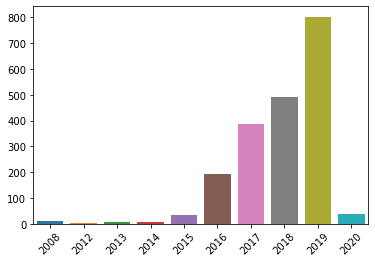

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(
    x = df_tv['year_added'].value_counts().keys(), 
    y = df_tv['year_added'].value_counts().values
)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show()

#### Observation:

It seems Netflix have added the most TV Show contents in 2019 following by year 2018. As we may not have much data collected for 2020, we can't comment on that!

## TV Show - Top countries

We will analyze in which countries Netflix added more contents with the help of barplot! We have analyzed only top 10 countries to avoid confusion in the plot.

[Text(0, 0, 'United States'),
 Text(0, 0, 'India'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'South Korea'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Mexico'),
 Text(0, 0, 'Turkey')]

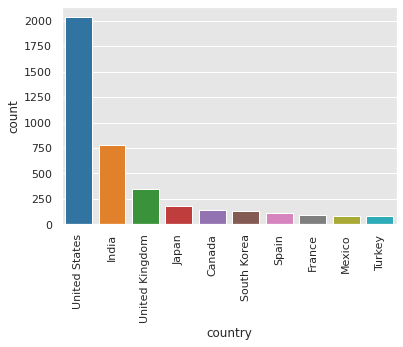

In [18]:
group_country_movies = df.groupby('country')['show_id'].count().sort_values(ascending = False).head(10)

countries_list = []
count_list = []
for index, value in group_country_movies.items():
    countries_list.append(index)
    count_list.append(value)
    
cars = {
    'country': countries_list,
    'count': count_list
}

df4 = pd.DataFrame(cars, columns = ['country', 'count'])


sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# possible styles: whitegrid, dark, white

sns.set_context("notebook")


ax = sns.barplot(x = "country", y = "count", data = df4)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

# You can collect more aesthetics from here:
# https://seaborn.pydata.org/tutorial/aesthetics.html

#### Observation:

* United States tops the list when it comes to TV Show content added from Netflix. More than 2000 contents added in the United States followed by India.
* In India, Netflix added 750 contents.
* UK and Japan become third and fourth place in Netflix content growth.

#### Questions for future analysis:
* How many TV Show contents added in India?
* Which year is the best for UK in terms of content growth?

Let's try to visualize the dataset by rating with the help of donut plot. 

In [19]:
# Let's create a donut pie chart with 

def show_donut_plot(col):
    
    rating_data = df.groupby(col)[['show_id']].count()
    plt.figure(figsize = (12, 8))
    plt.pie(rating_data['show_id'], autopct = '%1.0f%%', startangle = 140, pctdistance = 1.1, shadow = True)

    # create a center circle for more aesthetics to make it better
    gap = plt.Circle((0, 0), 0.5, fc = 'white')
    fig = plt.gcf()
    fig.gca().add_artist(gap)
    
    plt.axis('equal')
    plt.legend(df[col])
    
    plt.title('Donut Plot by ' +str(col), loc='center')
    
    plt.show()

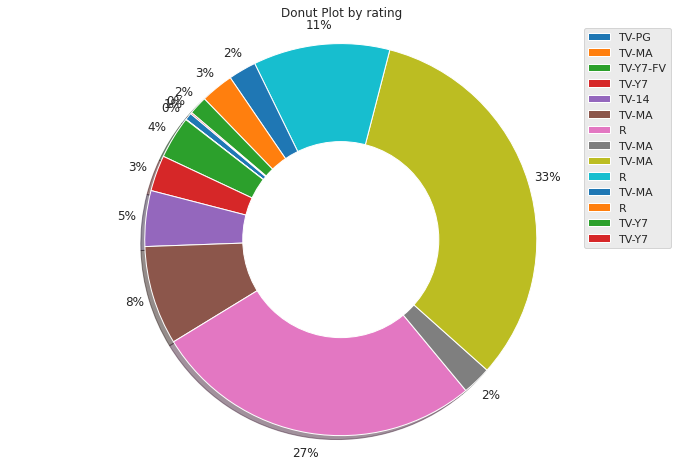

In [20]:
show_donut_plot('rating')

Let's find the starting and ending year of the dataset as they will help us in our upcoming data analysis

In [21]:
# Check tv shows added every year
min_year = int(df_tv['year_added'].min())
max_year = int(df_tv['year_added'].max())

In [22]:
min_year, max_year

(2008, 2020)

### Movies and TV Shows with subgroup (2017 - 2019)

Let's try to see the Movies and TV Shows growth by using plots with subgroups. We have used only 3 years to keep it clean for the analysis.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


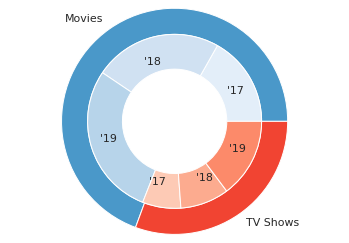

In [23]:
# Show Movies, TV Shows with subgroups

year_3_data = df[df['year_added'] > 2016]

year_3_data = year_3_data.drop(['title', 'director', 'cast', 'country', 'release_year', 'duration', 'rating', 'listed_in', 'description', 'date_added'], axis = 1)

# year_3_data
movie_count = len(year_3_data[year_3_data.type == 'Movie'])
tv_show_count = len(year_3_data[year_3_data.type == 'TV Show'])

year_3_data_movie = year_3_data[df['type'] == 'Movie']
year_3_data_tv = year_3_data[df['type'] == 'TV Show']

menu_sub= year_3_data[(year_3_data["type"] == 'Movie') & (year_3_data["year_added"] == 2018)] 

# Make data:
group_names = ['Movies', 'TV Shows']
group_size = [movie_count, tv_show_count]
subgroup_names = ["'17", "'18", "'19", "'17", "'18", "'19"]
subgroup_size = [
    len(year_3_data[(year_3_data["type"] == 'Movie') & (year_3_data["year_added"] == 2017)]), 
    len(year_3_data[(year_3_data["type"] == 'Movie') & (year_3_data["year_added"] == 2018)]), 
    len(year_3_data[(year_3_data["type"] == 'Movie') & (year_3_data["year_added"] == 2019)]), 
    
    len(year_3_data[(year_3_data["type"] == 'TV Show') & (year_3_data["year_added"] == 2017)]),
    len(year_3_data[(year_3_data["type"] == 'TV Show') & (year_3_data["year_added"] == 2018)]),
    len(year_3_data[(year_3_data["type"] == 'TV Show') & (year_3_data["year_added"] == 2019)]),
]

# Create colors
a, b = [plt.cm.Blues, plt.cm.Reds]

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, 
                labeldistance=0.7, 
                colors=[a(0.1), a(0.2), a(0.3), b(0.2), b(0.3), b(0.4), b(0.5)]
            )
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

plt.show()

#### Observation:

* In 2019, Netflix added more Movie content than in TV Shows

## TV Shows - Growth - Visualization

Let's check the content growth in simple plot. We are using plotly for better visualization

In [24]:
year_list = []
tv_shows_per_year = []

for year in range(min_year, max_year):
    year = int(year)
    
    c_year = len(df_tv[df_tv['year_added'] == year])
    
    year_list.append(year)
    tv_shows_per_year.append(c_year)

In [25]:
# Do a simple graph with Plotly
import plotly.graph_objects as go

data1 = go.Scatter(x = year_list, y = tv_shows_per_year, mode = 'lines+markers', name = 'TV Shows Count')

data = [data1]

layout = go.Layout(
    title = 'TV Shows per year',
    legend = dict (x = 0.1, y = 0.8, orientation = 'h')
)

fig = go.Figure(data, layout = layout)

fig.show()

#### Observation:

* We can see that more contents added from 2014 to 2019. It might be good news for people like me who prefer TV Shows than movies.

* We have ignored 2020 as it it not finished yet.

## TV Show - Content Bubble

To understand the content growth better, we can use the bubble plot. 

In [26]:
# Content by year
pclass = df_tv['year_added'].value_counts().to_frame().reset_index().rename(columns={'index':'year_added','year_added':'Count'})


fig1 = go.Figure(data=[go.Scatter(
    x = pclass['year_added'], 
    y = pclass['Count'],
    mode = 'markers',
    marker = dict(
        color = pclass['Count'],
        size = pclass['Count'] * 0.2,
        showscale = False
    ))])

# Use theme [plotly_dark, ggplot2, plotly_dark, seaborn, plotly, plotly_white, presentation, xgridoff]
fig1.layout.template = 'seaborn'

fig1.update_layout(title = 'Content by Year', xaxis_title = "Class", yaxis_title = "Count", title_x = 0.5)
fig1.show()

## TV Show - USA vs Canada

In [27]:
# Let's check US vs Canada
year_list             = []
tv_shows_per_year_us  = []
tv_shows_per_year_can = []
for year in range(min_year, max_year):
    year = int(year)

    count_year_us = len(df_tv.loc[(df_tv['year_added'] == year) & (df_tv.country == 'United States')])
    count_year_can = len(df_tv.loc[(df_tv['year_added'] == year) & (df_tv.country == 'Canada')])
    
    year_list.append(year)
    tv_shows_per_year_us.append(count_year_us)
    tv_shows_per_year_can.append(count_year_can)

In [28]:
data1 = go.Scatter(x = year_list, y = tv_shows_per_year_us, mode = 'lines+markers', name = 'TV Shows - USA')
data2 = go.Scatter(x = year_list, y = tv_shows_per_year_can, mode = 'lines+markers', name = 'TV Shows - Canada')

data = [data1, data2]

layout = go.Layout(
    title = 'TV Shows per year - USA vs Canada',
    legend = dict (x = 0.1, y = 0.9, orientation = 'h')
)

fig = go.Figure(data, layout = layout)

fig.show()

#### Observation:

* Comparing USA, Canada doesn't have much contents (sad news for Canada). 
* I presume that most of the USA contents can be viewed in Canada so Netflix didn't care much about adding local contents. (Only Netflix can answer this question huh?)

In [29]:
# Find top 10 countries and TV Shows
top_10_countries_se = df_tv.country.value_counts().head(10)

In [30]:
top_10_countries = []
for i, v in top_10_countries_se.items():
    top_10_countries.append(i)
    
print(top_10_countries)

['United States', 'United Kingdom', 'Japan', 'South Korea', 'Taiwan', 'Canada', 'India', 'France', 'Australia', 'Spain']


In [31]:
# Let's check top 10 countries' TV shows

year_list                  = []
tv_shows_per_year_country  = {}

for country in top_10_countries:
    tv_shows_per_year_country[country] = []

for year in range(min_year, max_year):
    year = int(year)
    
    current_country = {}
    
    for country in top_10_countries:
        current_country[country] = len(df_tv.loc[(df_tv['year_added'] == year) & (df_tv.country == country)])
    
    year_list.append(year)

    for country in top_10_countries:
        tv_shows_per_year_country[country].append(current_country[country])


In [32]:
data_dict = {}
data = []

for country in top_10_countries:
    
    data_dict[country] = go.Scatter(
        x = year_list, 
        y = tv_shows_per_year_country[country], 
        mode = 'lines+markers', 
        name = str(country)
    )
    data.append(data_dict[country])

layout = go.Layout(
    title = 'TV Shows per year - Various Countries',
    legend = dict (x = 0.1, y = 0.9, orientation = 'h')
)

fig = go.Figure(data, layout = layout)

fig.show()

#### Observation:

* Comparing other countries, more TV Show contents added more.
* Netflix started adding TV Show contents from 2014 rigorously.
* Netflix doubled the contents every year since 2014 in the US.

## TV Show Contents by Region

Let's try to get for different regions by using external API. In here we are using restcoutries API to get the countries for each region like `nafta`, `asean`, `au`, and etc.

API Links:
* [ASEAN](https://restcountries.eu/rest/v2/regionalbloc/asean)
* [African Union - au](https://restcountries.eu/rest/v2/regionalbloc/au)
* [Pacific Alliance region - pa](https://restcountries.eu/rest/v2/regionalbloc/pa)
* [North American Free Trade Agreement - nafta](https://restcountries.eu/rest/v2/regionalbloc/nafta)
* [South Asian Association for Regional Cooperation - saarc](https://restcountries.eu/rest/v2/regionalbloc/saarc)

API Base Links:
* [API Base](https://restcountries.eu/)
* [API Endpoints - Region](https://restcountries.eu/#api-endpoints-region)

In [33]:
# Get countries by region [https://restcountries.eu/#api-endpoints-name]
import requests

# This method will get countries by region
def get_countries_by_region(region):
    
    # Find asean countries
    resp = requests.get('https://restcountries.eu/rest/v2/regionalbloc/'+str(region))

    # if resp.status_code != 200:
    #     raise ApiError('GET /tasks/ {}'.format(resp.status_code))

    countries = []
    for item in resp.json():
        
        if(item['name'] == 'United States of America'):
            item['name'] = 'United States'
        
        countries.append(item['name'])

    # Check matched countries
    matched_countries = []
    for i, v in df_tv.country.value_counts().items():

        for country in countries:
            if(country == i):
                matched_countries.append(country)
    
    return matched_countries

def show_graph_by_region(region, region_title):

    matched_countries = get_countries_by_region(region)
    
    year_list                  = []
    tv_shows_per_year_country  = {}

    for country in matched_countries:
        tv_shows_per_year_country[country] = []

    for year in range(min_year, max_year):
        year = int(year)

        current_country = {}

        for country in matched_countries:
            current_country[country] = len(df_tv.loc[(df_tv['year_added'] == year) & (df_tv.country == country)])

        year_list.append(year)

        for country in matched_countries:
            tv_shows_per_year_country[country].append(current_country[country])

    data_dict = {}
    data = []

    for country in matched_countries:

        data_dict[country] = go.Scatter(
            x = year_list, 
            y = tv_shows_per_year_country[country], 
            mode = 'lines+markers', 
            name = str(country)
        )
        data.append(data_dict[country])

    layout = go.Layout(
        title = 'TV Shows - '+ region_title,
        legend = dict (x = 0.1, y = 0.9, orientation = 'h')
    )

    fig = go.Figure(data, layout = layout)

    fig.show()

In [34]:
# Show Association of Southeast Asian Nations
show_graph_by_region('asean', 'Association of Southeast Asian Nations (ASEAN)')

#### Observation:

* Thailand's content increase in the last 3 years.
* Singapore's content spiked suddenly in 2017 alone and no more growth after that.
* Netflix added very least in Indonesia

In [35]:
# Show African Union region (au)
show_graph_by_region('au', 'African Union region (AU)')

#### Observation:

* AU region is growing slowly, however it's a good progress for Netflix in the long term

In [36]:
# Show Pacific Alliance region (pa)
show_graph_by_region('pa', 'Pacific Alliance (PA)')

#### Observation:

* Netflix added more TV Show contents in Mexico than other countries in the region
* Chile doesn't have much contents

In [37]:
# Show NAFTA (North American Free Trade Agreement)
show_graph_by_region('nafta', 'North American Free Trade Agreement (NAFTA)')

#### Observation:

* Netflix added contents in the US 10 times more than other countries in the NAFTA region
* Same volume of contents added in Canada and Mexico

In [38]:
# Show SAARC (South Asian Association for Regional Cooperation)
show_graph_by_region('SAARC', 'South Asian Association for Regional Cooperation (SAARC)')

#### Observation:

* India has more contents than Pakistan

## Movie Content Growth

So far we have seen only TV Show contents. We will start collecting movies alone and then do analysis here.

In [39]:
# Get only Movies
df_movie = df[df['type'] == 'Movie']

In [40]:
df_movie.head()

show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   
1  80117401  Movie               Jandino: Whatever it Takes   
4  80125979  Movie                             #realityhigh   
6  70304989  Movie                                 Automata   
7  80164077  Movie       Fabrizio Copano: Solo pienso en mi   

                          director  \
0         Richard Finn, Tim Maltby   
1                              NaN   
4                 Fernando Lebrija   
6                      Gabe Ibáñez   
7  Rodrigo Toro, Francisco Schultz   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   
6  Antonio Banderas, Dylan McDermott, Melanie Gri...   
7                                    Fabrizio Copano   

                                    country date_added  release_year rating  \
0  United States, India, South Korea, China 2019-09-09          2019  TV-PG   
1                            United Kingdom 2016-09-09          2016  TV-MA   
4                             United States 2017-09-08          2017  TV-14   
6    Bulgaria, United States, Spain, Canada 2017-09-08          2014      R   
7                                     Chile 2017-09-08          2017  TV-MA   

  duration                                          listed_in  \
0   90 min                 Children & Family Movies, Comedies   
1   94 min                                    Stand-Up Comedy   
4   99 min                                           Comedies   
6  110 min  International Movies, Sci-Fi & Fantasy, Thrillers   
7   60 min                                    Stand-Up Comedy   

                                         description  month_added  year_added  
0  Before planning an awesome wedding for his gra...            9        2019  
1  Jandino Asporaat riffs on the challenges of ra...            9        2016  
4  When nerdy high schooler Dani finally attracts...            9        2017  
6  In a dystopian future, an insurance adjuster f...            9        2017  
7  Fabrizio Copano takes audience participation t...            9        2017

In [41]:
# This method will get countries by region
def get_countries_by_region_for_movies(region):
    
    # Find asean countries
    resp = requests.get('https://restcountries.eu/rest/v2/regionalbloc/'+str(region))

    # if resp.status_code != 200:
    #     raise ApiError('GET /tasks/ {}'.format(resp.status_code))

    countries = []
    for item in resp.json():
        
        if(item['name'] == 'United States of America'):
            item['name'] = 'United States'
        
        countries.append(item['name'])

    # Check matched countries
    matched_countries = []
    for i, v in df_movie.country.value_counts().items():

        for country in countries:
            if(country == i):
                matched_countries.append(country)
    
    return matched_countries

def show_movie_graph_by_region(region, region_title):

    matched_countries = get_countries_by_region_for_movies(region)
    
    year_list                  = []
    tv_shows_per_year_country  = {}

    for country in matched_countries:
        tv_shows_per_year_country[country] = []

    for year in range(min_year, max_year):
        year = int(year)

        current_country = {}

        for country in matched_countries:
            current_country[country] = len(df_movie.loc[(df_movie['year_added'] == year) & (df_movie.country == country)])

        year_list.append(year)

        for country in matched_countries:
            tv_shows_per_year_country[country].append(current_country[country])

    data_dict = {}
    data = []

    for country in matched_countries:

        data_dict[country] = go.Scatter(
            x = year_list, 
            y = tv_shows_per_year_country[country], 
            mode = 'lines+markers', 
            name = str(country)
        )
        data.append(data_dict[country])

    layout = go.Layout(
        title = 'Movies - '+ region_title,
        legend = dict (x = 0.1, y = 0.9, orientation = 'h')
    )

    fig = go.Figure(data, layout = layout)

    fig.show()

In [42]:
# Show Association of Southeast Asian Nations
show_movie_graph_by_region('asean', 'Association of Southeast Asian Nations (ASEAN)')

#### Observation:

* More movies added in Philippies in 2019 than other countries in this region.
* Thailand and Indonesia has more movies added in the last 3 years.
* Cambodia has the least movies added than other countries in the region.

In [43]:
# Show Pacific Alliance region (pa)
show_movie_graph_by_region('pa', 'Pacific Alliance (PA)')

#### Observation:

* In PA region, Mexico has more movies added than other countries.
* Since 2015, movies spiked in Mexico, reaching the highest in 2017.


In [44]:
# Show NAFTA (North American Free Trade Agreement)
show_movie_graph_by_region('nafta', 'North American Free Trade Agreement (NAFTA)')

#### Observation:

* Like TV Shows, more movies added in the US than Mexico and Canada.
* Significant amount of movies added in the US since 2014 and it kept increasing.
* Comparing Mexico, Canada has more movies.

## Movie and TV Shows by Country

Let's start comparing Movies vs TV Shows for countries. For sample we will use USA and Canada

In [45]:
# Let's check TV Shows and Movies

def show_movies_vs_tvshows(country = 'United States'):

    year_list        = []
    movies_country   = []
    tv_shows_country = []
    
    for year in range(min_year, max_year):
        year = int(year)

        movies_count_country = len(df.loc[(df['year_added'] == year) & (df.country == country) & (df.type == 'TV Show')])
        tv_shows_count_country = len(df.loc[(df['year_added'] == year) & (df.country == country) & (df.type == 'Movie')])

        year_list.append(year)
        movies_country.append(movies_count_country)
        tv_shows_country.append(tv_shows_count_country)

    data_movies = go.Scatter(x = year_list, y = movies_country, mode = 'lines+markers', name = 'Movies ('+str(country) + ')')
    data_tv_shows = go.Scatter(x = year_list, y = tv_shows_country, mode = 'lines+markers', name = 'TV Shows ('+str(country) + ')')

    data = [data_movies, data_tv_shows]

    layout = go.Layout(
        title = 'Movies vs TV Shows - '+str(country),
        legend = dict (x = 0.1, y = 0.9, orientation = 'h')
    )

    fig = go.Figure(data, layout = layout)

    fig.show()

In [46]:
show_movies_vs_tvshows('United States')

#### Observation:

* In the US, though same amount of contents added in movies and TV Show, TV show content addition started incrasing from 2014 and kept increasing.
* In 2019, more than double TV Show contents added than movie contents. It's a good news for TV Show fans like me!

In [47]:
show_movies_vs_tvshows('Canada')

#### Observation:

* In Canada, though movie contents added more in the initial time, TV Show contents increased from 2017 and kept going.

In [48]:
show_movies_vs_tvshows('United Kingdom')

#### Observation:

* In the UK, almost same amount of TV Show contents and Movie contents added.

## Treemap

Let's get more visualization with the help of Treemap. 

For treemap, we need a new library called squarify. I have installed it by using pip install. Check the code below.

In [49]:
#!pip install squarify
# !pip show squarify

Let's do a simple Treemap plot by type. 

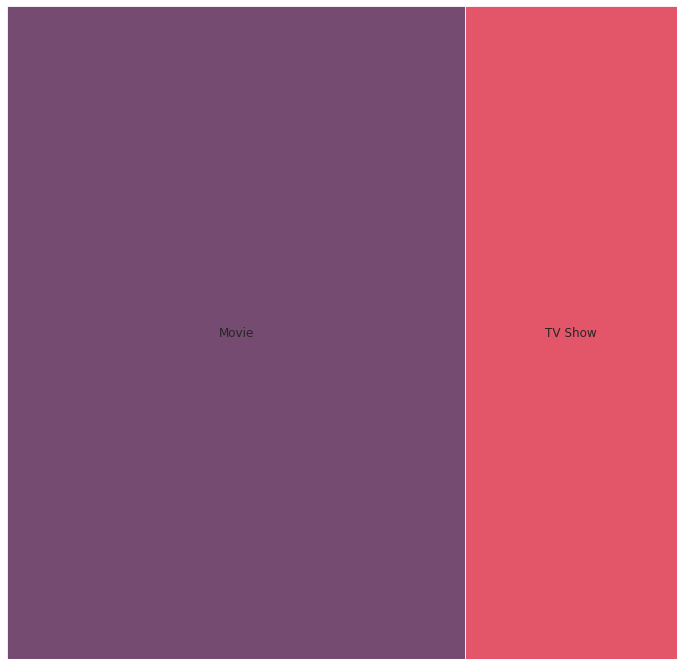

In [50]:
# show a treemap

import squarify

df_type_series = df.groupby('type')['show_id'].count()

type_sizes = []
type_labels = []
for i, v in df_type_series.items():
    type_sizes.append(v)
    type_labels.append(i)
    

fig, ax = plt.subplots(1, figsize = (12,12))
squarify.plot(sizes=type_sizes, 
              label=type_labels, 
              alpha=.8 )
plt.axis('off')
plt.show()

#### Observation:

* You can clearly see that movie contents are 4 times higher than TV Show contents.

Let's convert the treemap plot as a function to test with other columns. I have used only top 20 items to keep it simple and clean. Otherwise, it will be full of confusion and no use to understand.

In [51]:
# Let's create more treemap by converting the code as function
# I have used only top 20 item to avoid confusion

def show_treemap(col):
    df_type_series = df.groupby(col)['show_id'].count().sort_values(ascending = False).head(20)

    type_sizes = []
    type_labels = []
    for i, v in df_type_series.items():
        type_sizes.append(v)
        
        type_labels.append(str(i) + ' ('+str(v)+')')


    fig, ax = plt.subplots(1, figsize = (12,12))
    squarify.plot(sizes=type_sizes, 
                  label=type_labels[:10],  # show labels for only first 10 items
                  alpha=.2 )
    plt.title('TreeMap by '+ str(col))
    plt.axis('off')
    plt.show()

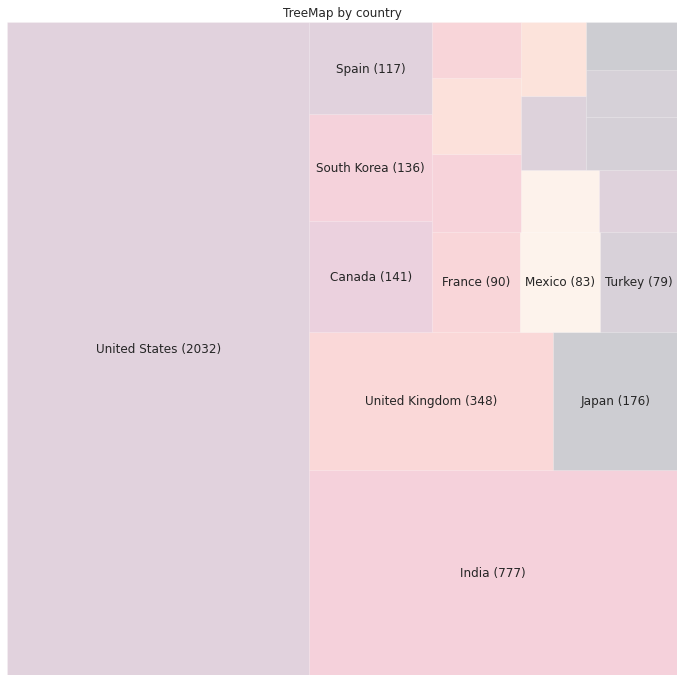

In [52]:
show_treemap('country')

#### Observation:

* More contents added in the States and India followed by the United Kingdom.
* Double the contents added in the UK than Japan.
* Almost same amount of contents added in Mexico and France. Same goes to South Korea and Canada.
* India has double the contents added than the UK.

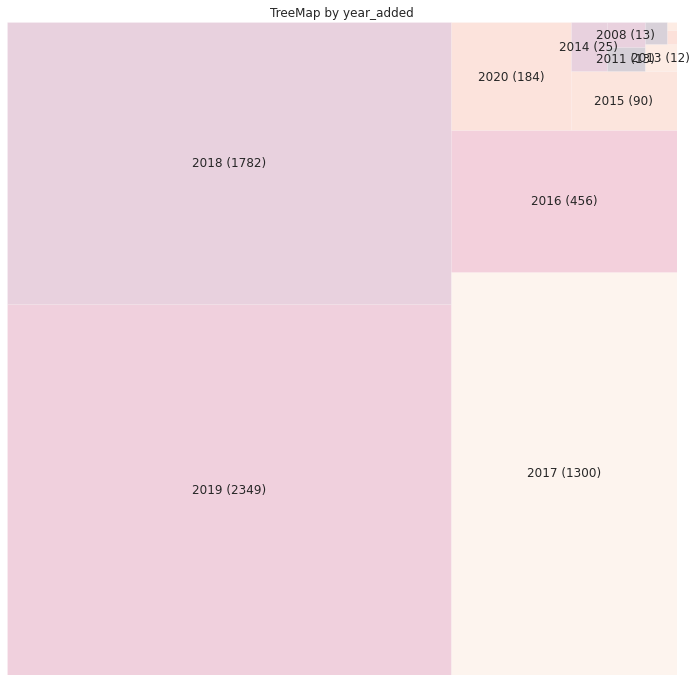

In [53]:
show_treemap('year_added')

#### Observation:

* Almost 500 more contents added every year from 2017.
* Netflix added more contents in 2019 than ever.
* 23 times more content added in 2019 than in 2015.

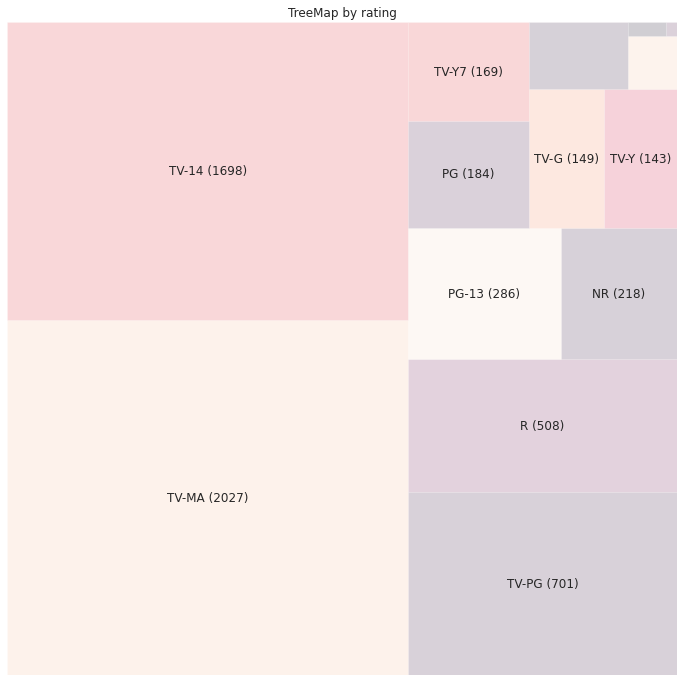

In [54]:
show_treemap('rating')

#### Observation:

* Matured Audience based contents is highest type comparing other types.
* TV-14 stands in the second place.

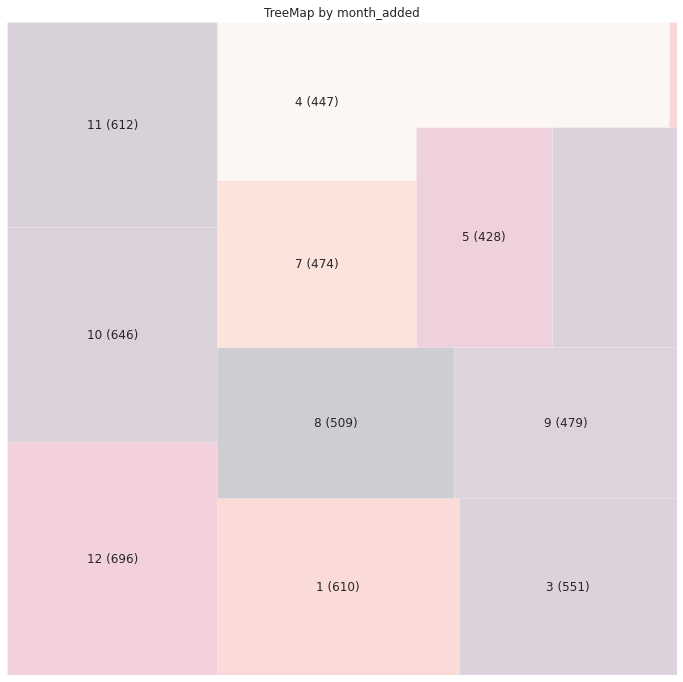

In [55]:
show_treemap('month_added')

#### Observation:

* In the month of December, Netflix added more contents than any other months.
* From October to December, more contents added by Netflix. May be holiday seasons?

## Final Notes

* Hope you have enjoyed my notebook. 
* Please **upvote if you like it**. 
* Also, please share some feedback so I can improve things and learn from you, may be.

**To do:**

* Find top directors, actors for each country
* Rating per country and year

<font color="blue" size=+1.5><b>Check out my other kernels</b></font>

<table style="font-family: 'Trebuchet MS', Arial, Helvetica, sans-serif;border-collapse: collapse;width: 100%;">
  <tr>
    <th style="border: 1px solid #ddd;padding: 8px; padding-top: 12px;padding-bottom: 12px;text-align: left;background-color: #2987E7;color: white;">Notebook</th>
    <th style="border: 1px solid #ddd;padding: 8px; padding-top: 12px;padding-bottom: 12px;text-align: left;background-color: #2987E7;color: white;">Tags</th>
  </tr>
  <tr>
    <td style="text-align: left"><a href="https://www.kaggle.com/rajacsp/sof-questions-eda-and-visual">SOF Questions - EDA and Visual</a> </td>
    <td style="text-align: left">Data Visual, Plotly</td>
  </tr>
  <tr>
    <td style="background-color: #f2f2f2;text-align: left"><a href="https://www.kaggle.com/rajacsp/netflix-visualization-plotly-plots-treemap">Netflix - Visualization, Plotly, Plots, and Treemap</a> </td>
    <td style="background-color: #f2f2f2;text-align: left">Data Visual, Data Cleaning, Plotly</td>
  </tr>
  <tr>
    <td style="text-align: left"><a href="https://www.kaggle.com/rajacsp/prediction-with-various-algorithms">Prediction with various Algorithms</a> </td>
    <td style="text-align: left">Random Forest, Logistic Regression</td>
  </tr>
  <tr>
    <td style="background-color: #f2f2f2;text-align: left"><a href="https://www.kaggle.com/rajacsp/eda-and-visualization">EDA and Visualization</a> </td>
    <td style="background-color: #f2f2f2;text-align: left">Data Cleaning, Data Visual</td>
  </tr>
  <tr>
    <td style="text-align: left"><a href="https://www.kaggle.com/rajacsp/job-analysis-eda-visual">Job Analysis - EDA and Visual</a> </td>
    <td style="text-align: left">Data Visual, EDA, Plotly</td>
  </tr>   
  <tr>
    <td style="background-color: #f2f2f2;text-align: left"><a href="https://www.kaggle.com/rajacsp/estonia-disaster-visualization">Estonia Disaster - Visualization</a> </td>
    <td style="background-color: #f2f2f2;text-align: left">Data Visual, EDA, Data Cleaning</td>
  </tr>
    
  <tr>
    <td style="text-align: left"><a href="https://www.kaggle.com/rajacsp/pandas-dundas-challenge-100" >Pandas 100+ exercises collection</a></td>
    <td style="text-align: left">Pandas, Data Manipulation</td>
  </tr>   
  <tr>
    <td style="background-color: #f2f2f2;text-align: left"><a href="https://www.kaggle.com/rajacsp/prediction-with-various-algorithms">Credit Card Fraud - Prediction with various algorithms</a></td>
    <td style="background-color: #f2f2f2;text-align: left">Various ML Algorithms</td>
  </tr>  
  <tr>
    <td style="text-align: left"><a href="https://www.kaggle.com/rajacsp/linear-equations-real-time">Linear Equations - Real Time</a> </td>
    <td style="text-align: left">Linear Equation</td>
  </tr>  
</table>